## 博彩赔率背后的数学公式

首先简单介绍一下什么是赔率。

2007年12月8日，阿森纳在英超联赛中主场迎战富勒姆。博彩公司BET365开出的赔率组合是：阿森纳获胜，赔率1.33；两队打平，赔率4.5；客队富勒姆获胜，赔率10。那么这些数字代表什么意思呢？

假设比赛前你押1元猜主队阿森纳获胜，而最终比赛结果确实是主队获胜，那么你就能赢回1.33元。扣除你押的1元，那么你的盈利就是0.33元。如果比赛结果是双方打平，或者客队胜，那么你就输掉了你押的1元钱。剩下两个赔率类似，代表你押对结果博彩公司会返回给你的钱。扣除你的本金1元，你获得的盈利分别为3.5元和9元。

#### 事件发生的可能性越小，赔率越大

赔率数字有大有小，这意味着你猜对结果的收益会不一样。比如你猜主队阿森纳胜并猜对结果，你获利0.33元；如果你猜客队获胜并猜对结果，那么你将获利9元。这样看来，似乎你应该押客队富勒姆获胜，因为这样盈利更多。但是如果你稍微有点足球概念，你就会知道在英超联赛中阿森纳的实力要比富勒姆强很多，而阿森纳又是在主场有着所谓的“主场优势”，这就意味着阿森纳赢得比赛结果的可能性更大。因此，虽然押富勒姆获胜你的盈利会很大，但是这件事情发生的可能性却很小。

#### 赔率是怎么定下来的

赔率是博彩公司制定的。博彩公司会根据自己的经验开出一个初始赔率。但这并没有那么重要。重要的是：博彩公司会根据彩民的投注比例调整赔率，从而保证无论出现什么样的比赛结果，博彩公司都能赚钱。

以上面提到的阿森纳对阵富勒姆的比赛为例。假设在全体彩民中，押阿森纳获胜的投注比例是$f_{0}$，对应博彩公司开出的赔率是$b_{0}$；押两队打平的比例是$f_{1}$，对应博彩公司开出的赔率为$b_{1}$；押富勒姆获胜的比例是$f_{2}$，对应博彩公司开出的赔率为$b_{2}$。容易知道，所有结果的投注比例之和为1：

$$f_{0}+f_{1}+f_{2}=1$$

如果最终比赛结果是阿森纳赢，那么博彩公司的收益为（假设总的投注额为1）：

$$-f_{0}(b_{0}-1)+f_{1}+f_{2}=1-f_{0}\times b_{0}$$

上面公式左侧第一部分为博彩公司返还给押对结果的彩民的钱，而后面部分$f_1+f_2$为博彩公司从押错结果的彩民那里得到的钱。
博彩公司只要能够保证这一收益大于$0$即可：

$$f_{0}\times b_{0}<1$$

同样地，若比赛结果是双方打平或者富勒姆获胜时，博彩公司需保证下面两个不等式成立才能赚钱：

$$f_{1}\times b_{1}<1$$

$$f_{2}\times b_{2}<1$$

只要能同时保证上述三个不等式成立，博彩公司就一定能赚钱。而$f_{0}$，$f_{1}$和$f_{2}$代表着投注比例，因此博彩公司只要根据投注比例和上述三个不等式调整赔率，就肯定能赚钱。

当上述三个不等式成立时：

$$f_{0}<\frac{1}{b_{0}}$$
$$f_{1}<\frac{1}{b_{1}}$$
$$f_{2}<\frac{1}{b_{2}}$$

又$f_{0}+f_{1}+f_{2}=1$，所以：

$$\frac{1}{b_{0}}+\frac{1}{b_{1}}+\frac{1}{b_{2}}>1$$

因此，博彩公司开出的赔率一定满足：

#### 所有结果对应赔率的倒数之和大于1。

无一例外。

通过前面阿森纳和富勒姆比赛的赔率简单验证一下：$1/1.33+1/4.5+1/10=1.074$，大于1。通常情况下，博彩公司会使得这一赔率倒数和介于1到1.1之间。这一数字比1越大，博彩公司可能赚的就更多；离1越近，可能赚的更少。但只要大于1，博彩公司就一定能赚钱。

对22592场欧洲各大联赛比赛的赔率做一个统计，计算出赔率倒数和，其值的分布如下所示。

In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')
sns.set_style({'font.sans-serif':['simhei','Arial']}) #图中显示中文

In [9]:
# 导入包含赔率信息的比赛数据
data_folder = os.path.join(os.path.pardir, 'data_source', 'kaggle')
match = pd.read_csv(os.path.join(data_folder, 'match.csv'))

# 选择赔率源：B365, BW, IW, LB, PS, WH, SJ, VC, GB, BS
odds_source= 'B365'
odds_columns = ['{}H'.format(odds_source), '{}D'.format(odds_source), '{}A'.format(odds_source)]

match_sel = match
for col in odds_columns:
    match_sel = match_sel[match_sel[col].notnull()]

odds = match_sel[odds_columns].values
odds_inv = 1/odds

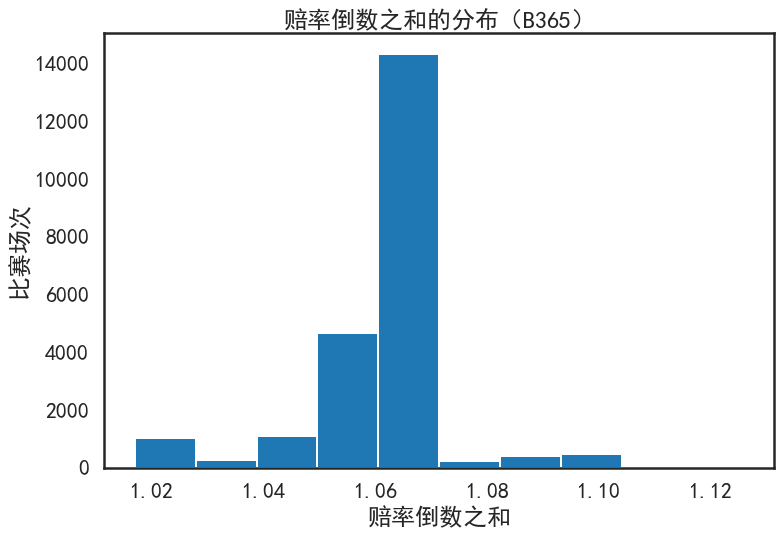

In [10]:
plt.figure(figsize=(12, 8))
plt.hist(np.sum(odds_inv, axis=1))
plt.xlabel('赔率倒数之和')
plt.ylabel('比赛场次')
plt.title('赔率倒数之和的分布（{}）'.format(odds_source));

BET365开出的赔率一定使得赔率的倒数之和大于1，并且集中分布在1.07左右。其他博彩公司的赔率也有类似的结果。

In [11]:
match_sel = match
for odds_source in ['B365', 'BW', 'IW', 'LB', 'WH']:
    odds_columns = ['{}H'.format(odds_source), '{}D'.format(odds_source), '{}A'.format(odds_source)]    
    for col in odds_columns:
        match_sel = match_sel[match_sel[col].notnull()]
    odds = match_sel[odds_columns].values
    odds_inv = 1/odds
    match_sel['{}_inv'.format(odds_source)] = np.sum(odds_inv, axis=1)

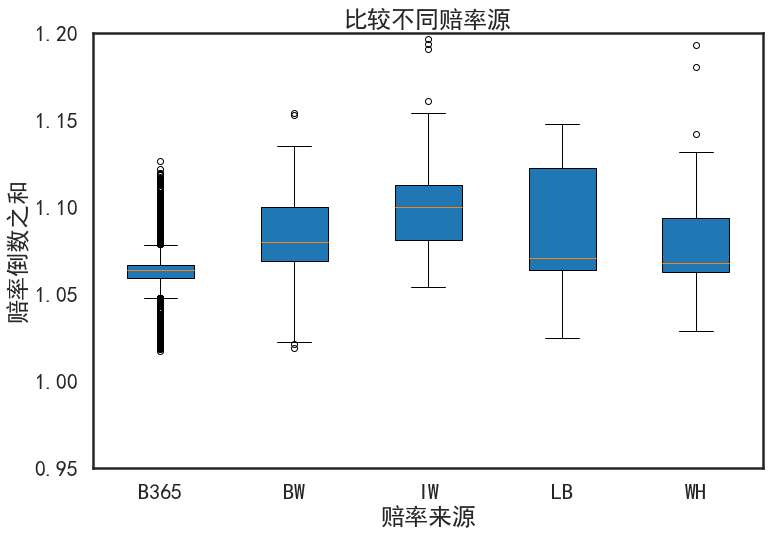

In [12]:
labels = ['B365', 'BW', 'IW', 'LB', 'WH']
all_data = [match_sel['{}_inv'.format(odds_source)].values for odds_source in labels]
plt.figure(figsize=(12, 8))
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.ylim(0.95, 1.2)
plt.title('比较不同赔率源')
plt.ylabel('赔率倒数之和')
plt.xlabel('赔率来源');

若赔率的倒数之和小于1，则彩民一定可以找到投注比例满足下面不等式使得博彩公司赔钱：

$$f_{0}>\frac{1}{b_{0}}$$
$$f_{1}>\frac{1}{b_{1}}$$
$$f_{2}>\frac{1}{b_{2}}$$

#### 参考资料
数据来源：https://www.kaggle.com/hugomathien/soccer